## Prueba #0601

### "Análisis de clasificación con PNL"

#### Responda las siguientes preguntas proporcionando código Python:
#### Objectivos:
- Preprocesamiento de datos de texto.
- Crear una representación TF IDF.
- Realizar el análisis predictivo mediante el algoritmo Naive Bayes.

In [1]:
import numpy as np
import re
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from nltk.corpus import stopwords
from sklearn.datasets import load_files
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
warnings.filterwarnings('ignore')               # Desactivar las advertencias

#### Leer los datos:
Datos de reseñas de películas del departamento de CS de Cornell. <br>
- Los datos se pueden encontrar [aquí](https://www.cs.cornell.edu/people/pabo/movie-review-data). <br>
- Descarga y descomprimir el "conjunto de datos polarity". <br>
- Bajo la carpeta "txt_sentoken", hay subcarpetas "pos" y "neg". <br>

In [2]:
# Especifique la carpeta y lea las subcarpetas.
reviews = load_files('./txt_sentoken/')
my_docs, y = reviews.data, reviews.target

In [3]:
len(my_docs)

2002

In [4]:
np.unique(y, return_counts=True)

(array([0, 1]), array([1001, 1001], dtype=int64))

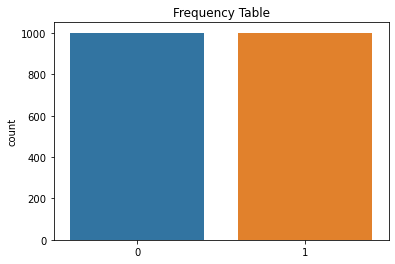

In [5]:
# Visualizar la variable de respuesta.
sns.countplot(y).set_title("Frequency Table")
plt.show()

1). Realizar el preprocesamiento de los datos:

Realizo un stopwords

In [6]:
nltk.download('stopwords')
stopwords_english = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Andrea\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
print(stopwords_english)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [8]:
count_vectorizer = CountVectorizer(stop_words = stopwords_english)
stopwords_data = count_vectorizer.fit_transform(my_docs)
print(stopwords_data.shape)

(2002, 39516)


Realizo un bag of words.

In [9]:
bag_of_words = count_vectorizer.fit_transform(my_docs)
print(bag_of_words.shape)

(2002, 39516)


In [10]:
corpus = []
for i in range(0, len(my_docs)):
    review = re.sub(r'\W', ' ', str(my_docs[i]))
    review = review.lower()
    review = re.sub(r'^br$', ' ', review)
    review = re.sub(r'\s+br\s+',' ',review)
    review = re.sub(r'\s+[a-z]\s+', ' ',review)
    review = re.sub(r'^b\s+', '', review)
    review = re.sub(r'\s+', ' ', review)# Eliminar los espacios en blanco sobrantes incluidos en los pasos anteriores.
    corpus.append(review)
    
print(corpus[0])

bad bad nbad nthat one word seems to pretty much sums up beyond the valley of the dolls nif that summary isn enough for you how about a a a nstill haven got the point nother than director russ meyer predilection for casting attractive large breasted women who ultimately expose the afore mentioned anatomical areas there is really only one other reason to recommend even taking look at this movie nthat is the fact that it was co written by famed film critic roger ebert who also was responsible for the screenplay nafter watching this movie you will never be able to sit through another one of his reviews where he gives movie thumbs down for bad writing with straight face nthis movie stinks out loud nquite frankly this movie deserves r nbut there are parts of it that are so bad they are almost funny nso m giving it r nand maybe that is too generous nright from the opening credits knew that had class bomb on my hands nnot only are the way the credits actually shot distracting but the first sc

2). Crear una representación TF IDF.

In [14]:
X = count_vectorizer.fit_transform(my_docs)
counts = X.toarray()
tfidf_transformer = TfidfTransformer()
X_transformed = tfidf_transformer.fit_transform(counts)
print(X_transformed.toarray().max()) #Miro el máximo para comprobar que lo esta realizando, ya que la vision del array
#Solo muestra 0s
print(X_transformed.toarray())

0.8646915430422331
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


3). Aplicar el algoritmo de Naive Bayes algorithm. Calcular la exactitud.

In [23]:
classifier = GaussianNB();
X_train, X_test, y_train, y_test = train_test_split(X.toarray(), y, test_size = 0.25, random_state = 0)

classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(acc)

0.6506986027944112
